In [5]:
def eliminacion_gaussiana(A, b):
    n = len(b)
    
    # Convertir A y b en una matriz aumentada
    for i in range(n):
        A[i].append(b[i])
    
    # Eliminación hacia adelante
    for i in range(n):
        # Encontrar el pivote y cambiar filas si es necesario
        max_fila = i + max(range(n - i), key=lambda k: abs(A[i + k][i]))
        if i != max_fila:
            A[i], A[max_fila] = A[max_fila], A[i]
        
        # Asegurarse de que el pivote no sea cero
        if A[i][i] == 0:
            raise ValueError("El sistema no tiene solución única.")
        
        # Hacer ceros debajo del pivote
        for j in range(i + 1, n):
            factor = A[j][i] / A[i][i]
            for k in range(i, n + 1):  # Incluye columna extra de b
                A[j][k] -= factor * A[i][k]
    
    # Sustitución hacia atrás
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = A[i][n] / A[i][i]
        for j in range(i - 1, -1, -1):
            A[j][n] -= A[j][i] * x[i]
    
    return x

In [6]:
def resolver_sistema_ecuaciones(A, b):
    return eliminacion_gaussiana([row[:] for row in A], b[:])

In [9]:
xs = [
    -4.5830, -4.4553, -3.9234, -3.7518, -2.8305, -2.4637, -2.4439, -1.6802, -1.6459,
    -1.4819, -0.9753, -0.9674, -0.8680, -0.8119, -0.6186, 0.1804, 0.2982, 0.4094,
    0.7886, 0.9505, 0.9901, 1.2252, 1.4536, 1.7131, 2.0913, 2.1728, 2.1733, 2.1864,
    2.3588, 2.3641, 3.0217, 3.1986, 3.2123, 3.2376, 3.7627, 3.9286, 4.3735, 4.5765,
    4.9022, 4.9421,
]

ys = [
    -2.2055, -1.4182, -0.1380, 3.4292, 2.3377, 1.8784, 3.5443, -0.6359, 0.8778,
    2.4107, 1.2681, -1.1540, -1.8487, -0.5652, -1.6703, -1.0710, -3.9284, -3.3157,
    -0.8727, -1.9583, -0.5810, 0.1306, -0.1434, -2.7076, 1.0219, 0.7264, 0.3696,
    2.1279, 3.5456, 2.8647, 5.4094, 10.0706, 7.0016, 7.9526, 18.4160, 18.3665,
    24.9403, 31.7173, 36.4407, 39.8225,
]

### Funcion Lineal

In [17]:
def lineal(x: float, pars: tuple[float]) -> float:
    a1, a0 = pars
    return a1 * x + a0

In [19]:
def ajustar_lineal(xs, ys):
    A = [
        [sum(xi**2 for xi in xs), sum(xs)],
        [sum(xs), len(xs)]
    ]
    b = [sum(xi * yi for xi, yi in zip(xs, ys)), sum(ys)]
    return resolver_sistema_ecuaciones(A, b)


In [20]:
import numpy as np

pars_lineal = ajustar_lineal(xs, ys)
x = np.linspace(min(xs), max(xs), 100)

# Evaluar la funcion ajustada
y_lineal = [lineal(xi, pars_lineal) for xi in x]

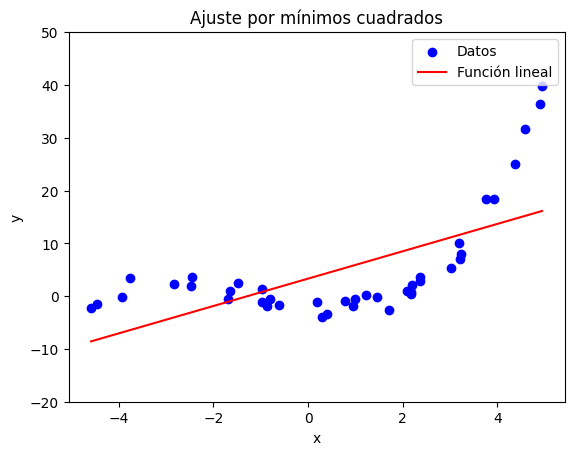

In [21]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys, label="Datos", color="blue")  # Datos originales
plt.plot(x, y_lineal, label="Función lineal", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

### Funcion Cuadratica

In [16]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [22]:
def ajustar_cuadratica(xs, ys):
    A = [
        [sum(xi**4 for xi in xs), sum(xi**3 for xi in xs), sum(xi**2 for xi in xs)],
        [sum(xi**3 for xi in xs), sum(xi**2 for xi in xs), sum(xs)],
        [sum(xi**2 for xi in xs), sum(xs), len(xs)]
    ]
    b = [sum(yi * xi**2 for xi, yi in zip(xs, ys)), sum(yi * xi for xi, yi in zip(xs, ys)), sum(ys)]
    return resolver_sistema_ecuaciones(A, b)


In [23]:
import numpy as np
pars_cuad = ajustar_cuadratica(xs, ys)
x = np.linspace(min(xs), max(xs), 100)

y_cuad = [cuadratica(xi, pars_cuad) for xi in x]


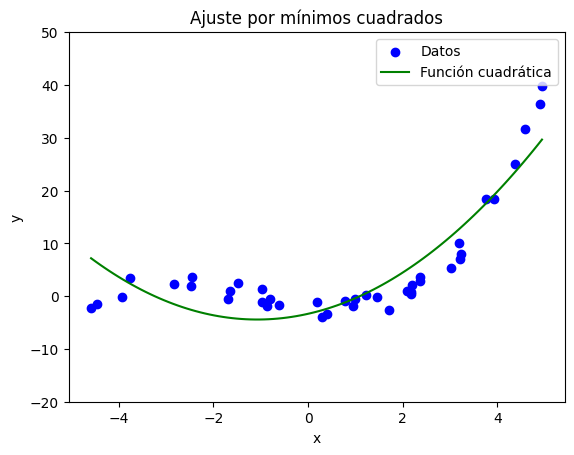

In [25]:
plt.scatter(xs, ys, label="Datos", color="blue")  # Datos originales
plt.plot(x, y_cuad, label="Función cuadrática", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

### Funcion Cubica

In [26]:
def cubica(x: float, pars: tuple[float]) -> float:
    a3, a2, a1, a0 = pars
    return a3 * x**3 + a2 * x**2 + a1 * x + a0

In [27]:
def ajustar_cubica(xs, ys):
    A = [
        [sum(xi**6 for xi in xs), sum(xi**5 for xi in xs), sum(xi**4 for xi in xs), sum(xi**3 for xi in xs)],
        [sum(xi**5 for xi in xs), sum(xi**4 for xi in xs), sum(xi**3 for xi in xs), sum(xi**2 for xi in xs)],
        [sum(xi**4 for xi in xs), sum(xi**3 for xi in xs), sum(xi**2 for xi in xs), sum(xs)],
        [sum(xi**3 for xi in xs), sum(xi**2 for xi in xs), sum(xs), len(xs)]
    ]
    b = [sum(yi * xi**3 for xi, yi in zip(xs, ys)), sum(yi * xi**2 for xi, yi in zip(xs, ys)),
         sum(yi * xi for xi, yi in zip(xs, ys)), sum(ys)]
    return resolver_sistema_ecuaciones(A, b)

In [28]:
pars_cub = ajustar_cubica(xs, ys)
x = np.linspace(min(xs), max(xs), 100)

y_cubica = [cubica(xi, pars_cub) for xi in x]

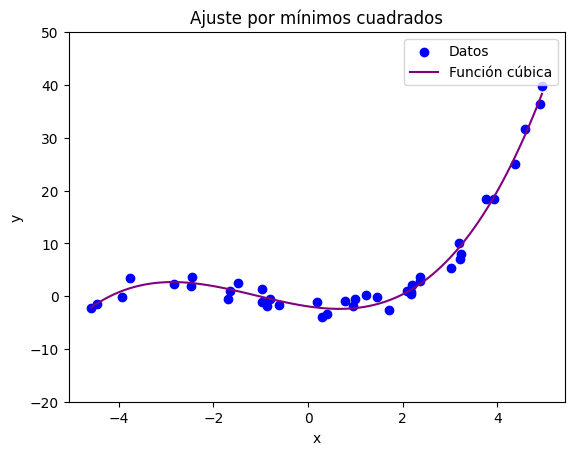

In [30]:
plt.scatter(xs, ys, label="Datos", color="blue")  # Datos originales
plt.plot(x, y_cubica, label="Función cúbica", color="purple")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

### Funcion Exponencial

In [31]:
def exponencial(x: float, pars: tuple[float]) -> float:
    a1, b = pars
    return a1 * np.exp(b * x)

In [34]:
import numpy as np

def ajustar_exponencial(xs, ys):
    log_ys = np.log(ys)
    b, log_a1 = ajustar_lineal(xs, log_ys)
    a1 = np.exp(log_a1)
    return a1, b

C:\Users\DELL\AppData\Local\Temp\ipykernel_9220\4251985519.py:4: RuntimeWarning: invalid value encountered in log
  log_ys = np.log(ys)


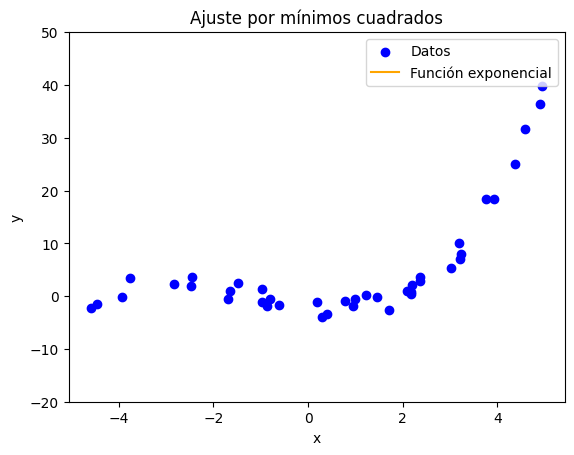

In [35]:
pars_exp = ajustar_exponencial(xs, ys)
x = np.linspace(min(xs), max(xs), 100)

y_exp = [exponencial(xi, pars_exp) for xi in x]

plt.scatter(xs, ys, label="Datos", color="blue")  
plt.plot(x, y_exp, label="Función exponencial", color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()


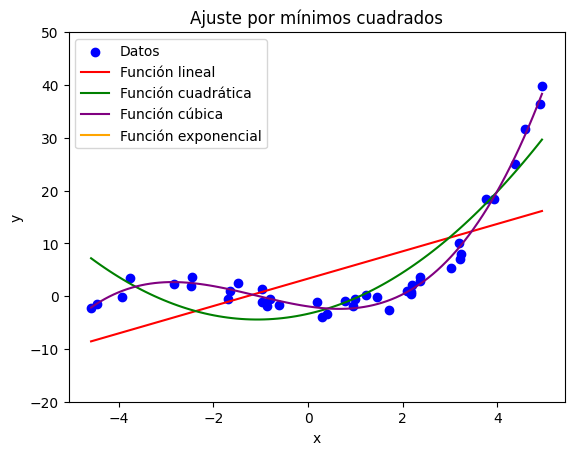

In [37]:
import matplotlib.pyplot as plt
# Graficar
plt.scatter(xs, ys, label="Datos", color="blue")  
plt.plot(x, y_lineal, label="Función lineal", color="red")
plt.plot(x, y_cuad, label="Función cuadrática", color="green")
plt.plot(x, y_cubica, label="Función cúbica", color="purple")
plt.plot(x, y_exp, label="Función exponencial", color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-20, 50)
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()
